In [2]:
'''
# download kaggle dataset
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('omkargurav/face-mask-dataset', path='../', unzip=True)
'''

"\n# download kaggle dataset\nimport kaggle\n\nkaggle.api.authenticate()\nkaggle.api.dataset_download_files('omkargurav/face-mask-dataset', path='../', unzip=True)\n"

## importing libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [4]:
with_mask_files = os.listdir('/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/with_mask')
print(len(with_mask_files))
print(with_mask_files[:5])
print(with_mask_files[-5:])

3725
['with_mask_3529.jpg', 'with_mask_892.jpg', 'with_mask_568.jpg', 'with_mask_2317.jpg', 'with_mask_438.jpg']
['with_mask_2654.jpg', 'with_mask_1837.jpg', 'with_mask_2664.jpg', 'with_mask_3017.jpg', 'with_mask_1122.jpg']


In [5]:
without_mask_files = os.listdir('/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/without_mask')
print(len(without_mask_files))
print(without_mask_files[:5])
print(without_mask_files[-5:])

3828
['without_mask_3046.jpg', 'without_mask_128.jpg', 'without_mask_862.jpg', 'without_mask_224.jpg', 'without_mask_500.jpg']
['without_mask_3539.jpg', 'without_mask_525.jpg', 'without_mask_3286.jpg', 'without_mask_2252.jpg', 'without_mask_91.jpg']


### Creating Labels for the two classes of Images

### with mask --> 1

### without mask --> 0

In [6]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [7]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [9]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Preprocessing the images

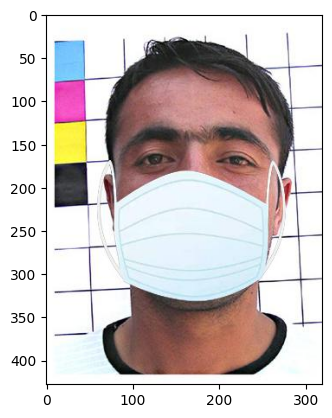

In [10]:
#  display with mask images

img_With_mask = mpimg.imread(f'/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/with_mask/{with_mask_files[5]}')
plt.imshow(img_With_mask)

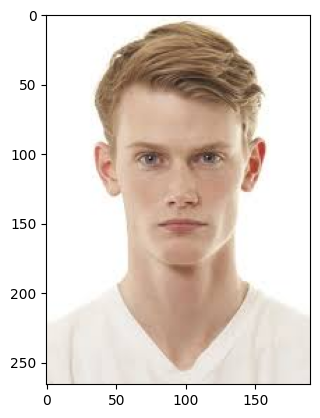

In [11]:
#  display with mask images

img_Without_mask = mpimg.imread(f'/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/without_mask/{without_mask_files[500]}')
plt.imshow(img_Without_mask)

In [12]:
# all imgaes are different sizes

print(img_With_mask.shape)
print(img_Without_mask.shape)

(428, 320, 3)
(266, 190, 3)


### 1. Resizing the images
### 2. Converting the images to numpy arrays

In [13]:
with_mask_path = '/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/with_mask'

data = []

for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/home/muhammed-shafeeh/anaconda3/envs/.conda/lib/python3.11/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
print(len(data))
print(data[0].shape)
print(data[-1].shape)

3725
(128, 128, 3)
(128, 128, 3)


In [15]:
print(data[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 255]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [252 252 253]
  [249 250 252]
  ...
  [249 249 251]
  [252 252 252]
  [255 255 255]]

 ...

 [[255 255 255]
  [243 243 246]
  [231 232 237]
  ...
  [241 241 245]
  [250 250 252]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [250 251 252]
  ...
  [252 252 253]
  [253 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [16]:
without_mask_path = '/home/muhammed-shafeeh/AI_ML/DL_face_mask_detection/data/without_mask'


for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [17]:
print(len(data))

7553


In [18]:
data[500]

array([[[150, 102,  79],
        [150, 102,  79],
        [149, 101,  78],
        ...,
        [246, 181, 163],
        [248, 186, 168],
        [247, 186, 168]],

       [[151, 103,  80],
        [150, 102,  79],
        [148, 100,  77],
        ...,
        [221, 153, 137],
        [235, 168, 152],
        [240, 175, 158]],

       [[149, 101,  78],
        [148, 100,  77],
        [145,  97,  74],
        ...,
        [199, 120, 103],
        [229, 151, 135],
        [245, 169, 155]],

       ...,

       [[ 64,  35,  39],
        [ 63,  34,  38],
        [ 60,  31,  36],
        ...,
        [ 47,  21,  34],
        [ 51,  25,  38],
        [ 52,  26,  39]],

       [[ 63,  34,  38],
        [ 61,  32,  37],
        [ 58,  29,  34],
        ...,
        [ 45,  19,  32],
        [ 49,  23,  36],
        [ 51,  25,  38]],

       [[ 64,  35,  39],
        [ 61,  31,  37],
        [ 56,  26,  34],
        ...,
        [ 43,  17,  30],
        [ 46,  20,  33],
        [ 48,  22,  35]]

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
type(data[0])

numpy.ndarray

In [23]:
# convert image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


### Train Test Split

In [24]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(6042,)
(1511, 128, 128, 3)
(1511,)


In [25]:
# scale the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

## Buidling Neural Network

In [27]:
import tensorflow as tf
from tensorflow import keras


2025-02-13 14:32:53.095633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739437373.143507   26902 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739437373.156945   26902 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 14:32:53.258056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
model.summary()

/home/muhammed-shafeeh/anaconda3/envs/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1739437376.296481   26902 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.1)

Epoch 1/5


2025-02-13 14:33:00.037419: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1068957696 exceeds 10% of free system memory.


170/170 ━━━━━━━━━━━━━━━━━━━━ 36s 205ms/step - accuracy: 0.6874 - loss: 0.7050 - val_accuracy: 0.9025 - val_loss: 0.2624
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.8769 - loss: 0.3172 - val_accuracy: 0.9058 - val_loss: 0.2420
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 203ms/step - accuracy: 0.9052 - loss: 0.2516 - val_accuracy: 0.9256 - val_loss: 0.2186
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.9220 - loss: 0.1802 - val_accuracy: 0.9140 - val_loss: 0.2300
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.9430 - loss: 0.1610 - val_accuracy: 0.9256 - val_loss: 0.2104


### Model Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy*100}%')

 3/48 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9583 - loss: 0.2901

2025-02-13 14:36:42.561377: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 297074688 exceeds 10% of free system memory.


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9390 - loss: 0.2074
Loss: 0.19838863611221313
Accuracy: 93.44804883003235%


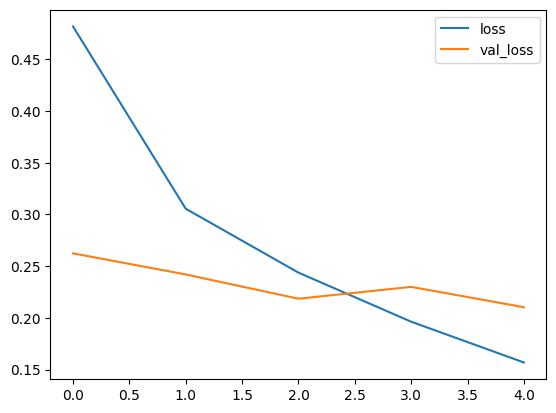

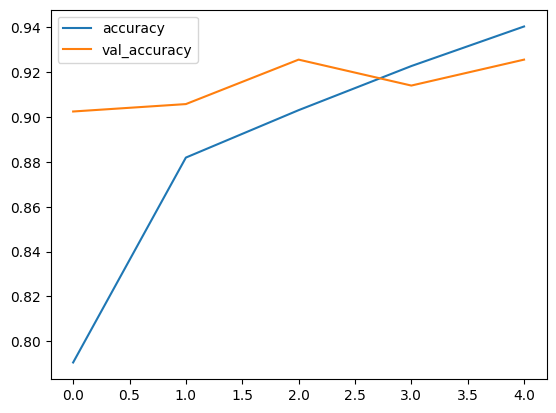

In [32]:
# plot the loss and accuracy

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1
The person is wearing a mask


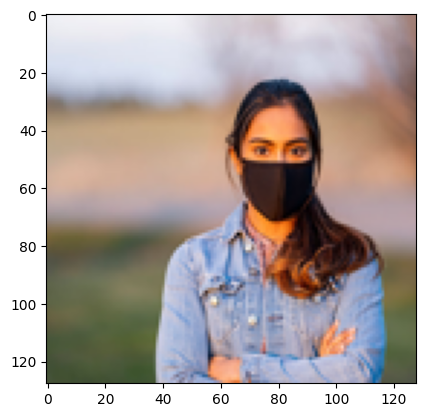

In [35]:
input_image_path = input("Enter the path of the input image: ")
input_image = Image.open(input_image_path)
input_image = input_image.resize((128,128))
input_image = input_image.convert('RGB')
input_image = np.array(input_image)
plt.imshow(input_image)
input_image = input_image/255

input_image = np.expand_dims(input_image, axis=0)

prediction = model.predict(input_image)

input_pred_label = np.argmax(prediction)
print(input_pred_label)

if input_pred_label == 0:
    print("The person is not wearing a mask")
else:
    print("The person is wearing a mask")